<a href="https://colab.research.google.com/github/IsaacMrSmile/Alura_Bootcamp_Data_Science/blob/main/Acamica_repaso_sprint_1_DS_REGRESI%C3%93N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La idea de este análisis es evidenciar diferencias entre pesos de bebés recién nacidxs según características de sus progenitores.

Los datos fueron extraídos del [área de estadísica de la Universidad de Sheffield](https://www.sheffield.ac.uk/mash/statistics/datasets).

# Análisis exploratorio de datos:

In [ ]:
# Importamos los paquetes necesarios:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

In [ ]:
# Importamos los datos desde la URL pública:

df = pd.read_csv("https://www.sheffield.ac.uk/polopoly_fs/1.937185!/file/Birthweight_reduced_kg_R.csv")

In [ ]:
df.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


Qué nos dice esto? Necesitamos más información sobre las variables?

De ser así, podemos encontrarla [aquí](https://www.sheffield.ac.uk/polopoly_fs/1.937184!/file/Birthweight_data_kg_description.docx)

In [ ]:
df.shape

(42, 16)

Vemos que es un dataset pequeño, probablemente porque es un dataset educativo.

Qué les parece este shape? Consideran que son suficientes filas para hacer un modelo de regresión?

Sabemos que tenemos 42 filas, es decir, 42 neonatxs. Podríamos chequear por si acaso que no haya ningún individuo repetido.

In [ ]:
df.ID.value_counts()

575     1
532     1
223     1
1764    1
27      1
1369    1
697     1
57      1
272     1
1272    1
1683    1
792     1
1360    1
462     1
1023    1
1600    1
569     1
1363    1
516     1
321     1
1313    1
1058    1
1187    1
1636    1
1081    1
1016    1
822     1
820     1
755     1
1522    1
300     1
752     1
431     1
1262    1
365     1
1388    1
619     1
553     1
808     1
1191    1
1107    1
1088    1
Name: ID, dtype: int64

Perfecto, ya sabemos que no hay bebés repetidxs!

In [ ]:
df.describe()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,894.071429,51.333333,3.312857,34.595238,39.190476,0.523810,25.547619,9.428571,164.452381,57.500000,28.904762,13.666667,17.190476,180.500000,0.142857,0.095238
std,467.616186,2.935624,0.603895,2.399792,2.643336,0.505487,5.666342,12.511737,6.504041,7.198408,6.863866,2.160247,17.308165,6.978189,0.354169,0.297102
min,27.000000,43.000000,1.920000,30.000000,33.000000,0.000000,18.000000,0.000000,149.000000,45.000000,19.000000,10.000000,0.000000,169.000000,0.000000,0.000000
25%,537.250000,50.000000,2.940000,33.000000,38.000000,0.000000,20.250000,0.000000,161.000000,52.250000,23.000000,12.000000,0.000000,175.250000,0.000000,0.000000
50%,821.000000,52.000000,3.295000,34.000000,39.500000,1.000000,24.000000,4.500000,164.500000,57.000000,29.500000,14.000000,18.500000,180.500000,0.000000,0.000000
75%,1269.500000,53.000000,3.647500,36.000000,41.000000,1.000000,29.000000,15.750000,169.500000,62.000000,32.000000,16.000000,25.000000,184.750000,0.000000,0.000000
max,1764.000000,58.000000,4.570000,39.000000,45.000000,1.000000,41.000000,50.000000,181.000000,78.000000,46.000000,16.000000,50.000000,200.000000,1.000000,1.000000


Ya podemos notarlo en el describe (siempre hay 42 observaciones), pero para ir haciendo a la práctica, chequeemos no tener valores nulos:

In [ ]:
df.isna().sum()

ID             0
Length         0
Birthweight    0
Headcirc       0
Gestation      0
smoker         0
mage           0
mnocig         0
mheight        0
mppwt          0
fage           0
fedyrs         0
fnocig         0
fheight        0
lowbwt         0
mage35         0
dtype: int64

Genial, no hay valores nulos!

Para saber el tipo de cada columna:

In [ ]:
df.dtypes

ID               int64
Length           int64
Birthweight    float64
Headcirc         int64
Gestation        int64
smoker           int64
mage             int64
mnocig           int64
mheight          int64
mppwt            int64
fage             int64
fedyrs           int64
fnocig           int64
fheight          int64
lowbwt           int64
mage35           int64
dtype: object

Tiene sentido que el peso sea el único valor float, en el resto tenemos cantidades (por ejemplo cuántos cigarrillos consumía la madre por día) o variables binarias (0 y 1).

Casualmente (guiño guiño), nos viene muy bien que esta variable sea numérica continua, ya que vamos a tratar de predecirla utilizando un modelo de regresión.

Tenemos que remover el ID para que no confunda a nuestro modelo:

In [ ]:
df.drop("ID", inplace = True, axis = 1)

Y ya podemos empezar a graficar!

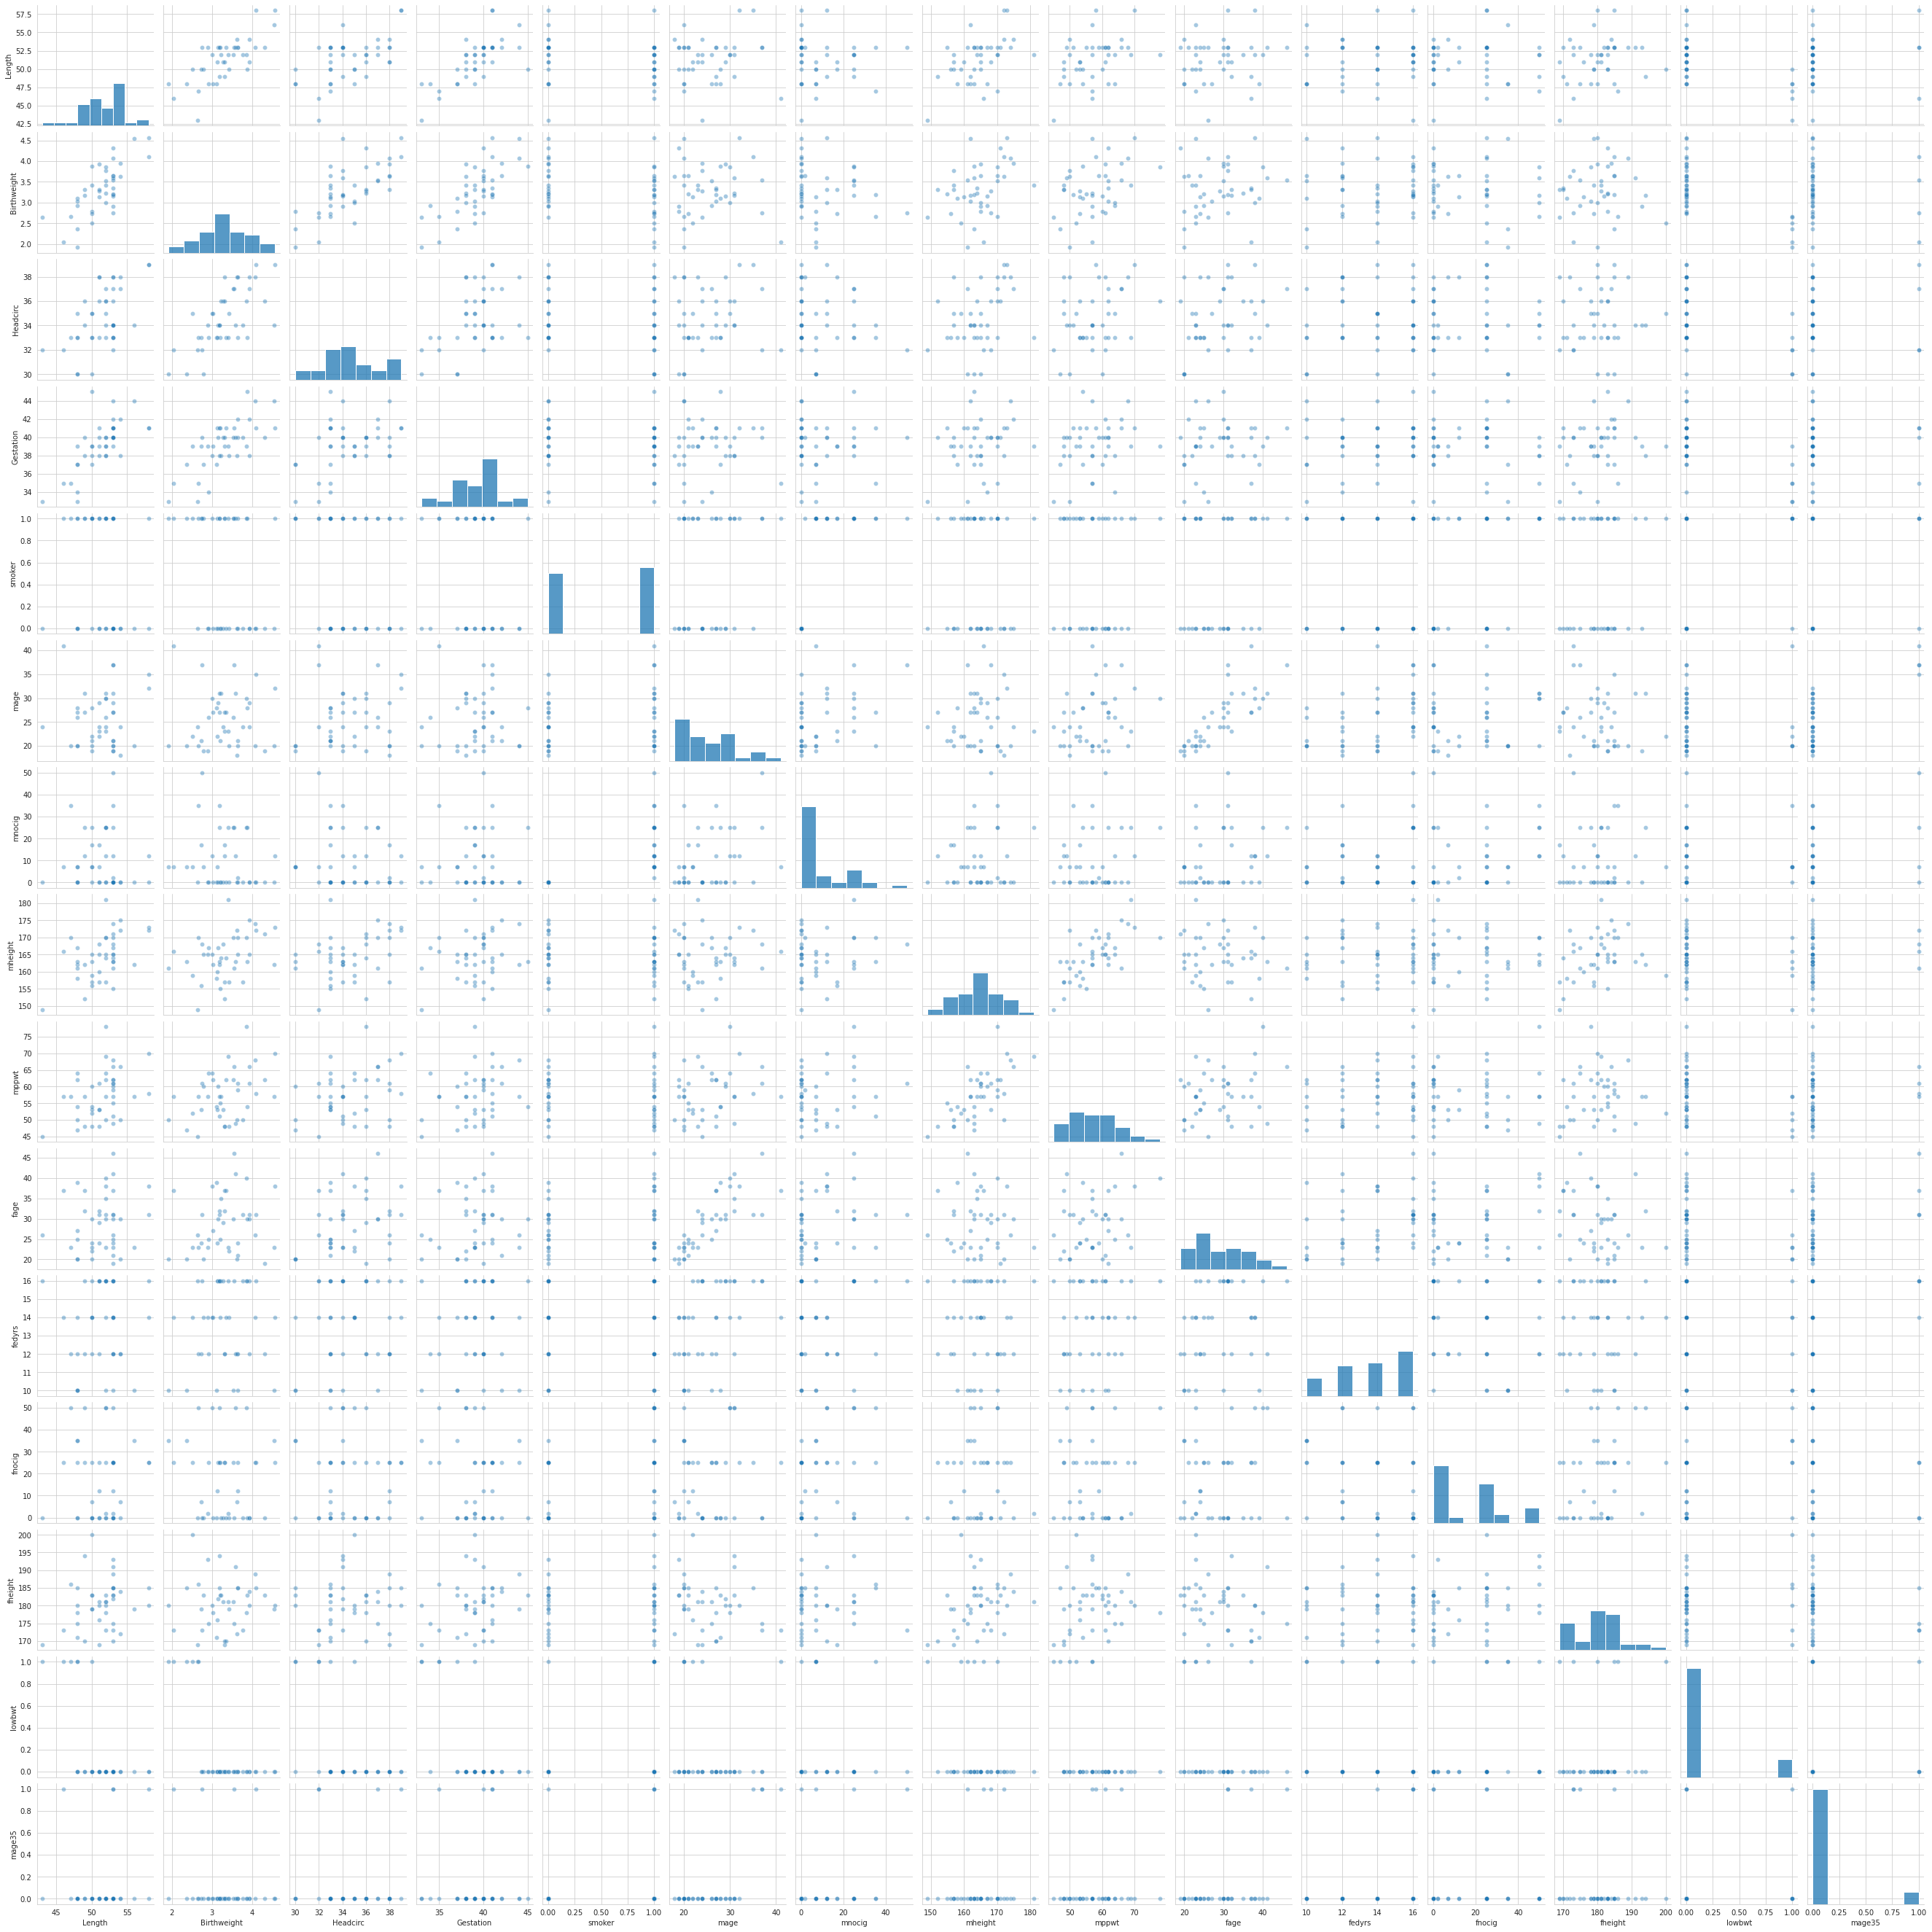

In [ ]:
sns.pairplot(data = df,
             plot_kws={'alpha':0.4})

Es un poco difícil de observar, no? Tal vez podríamos hacer uno para variables maternas, otro para paternas y otro para propias del neonato.

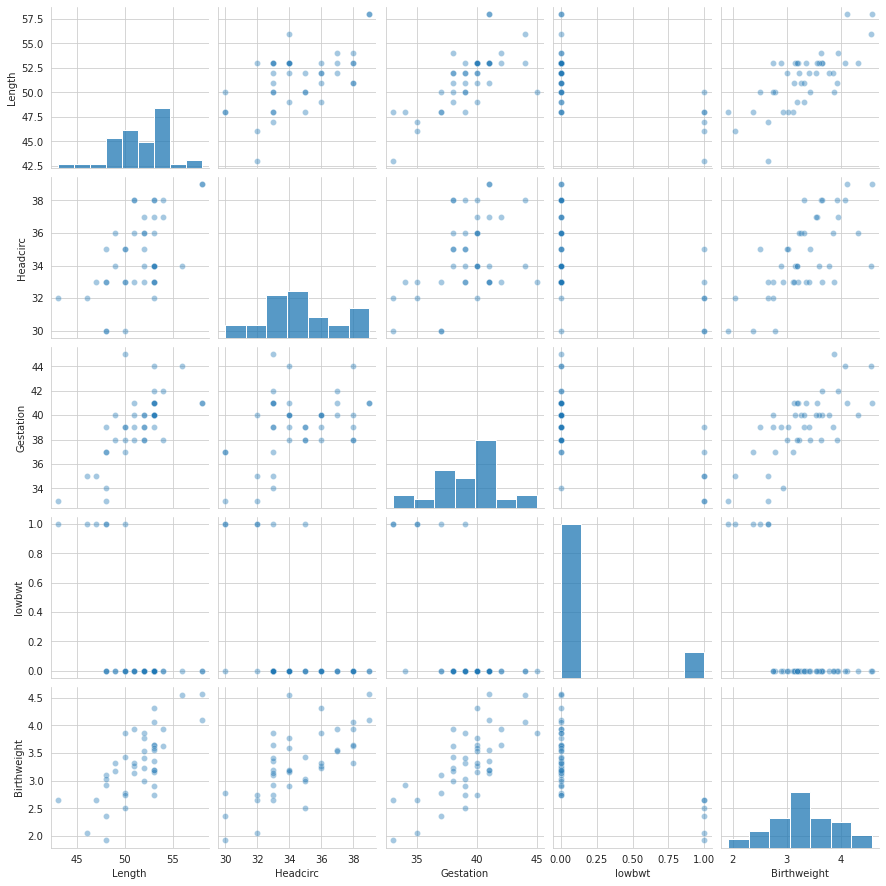

In [ ]:
# Del neonato:

sns.pairplot(data = df, vars = ['Length', 'Headcirc', 'Gestation', 'lowbwt', 'Birthweight'],
             plot_kws={'alpha':0.4})

Lógicamente, a mayor estatura y circunferencia craneana (ambos indicadores del tamaño) el peso pareciera aumentar.

Aparentemente la prolongación de la gestación también hace aumentar el peso al nacer.

Sin embargo, vemos que estas son tendencias generales pero bastante dispersas, y no tan lineales.

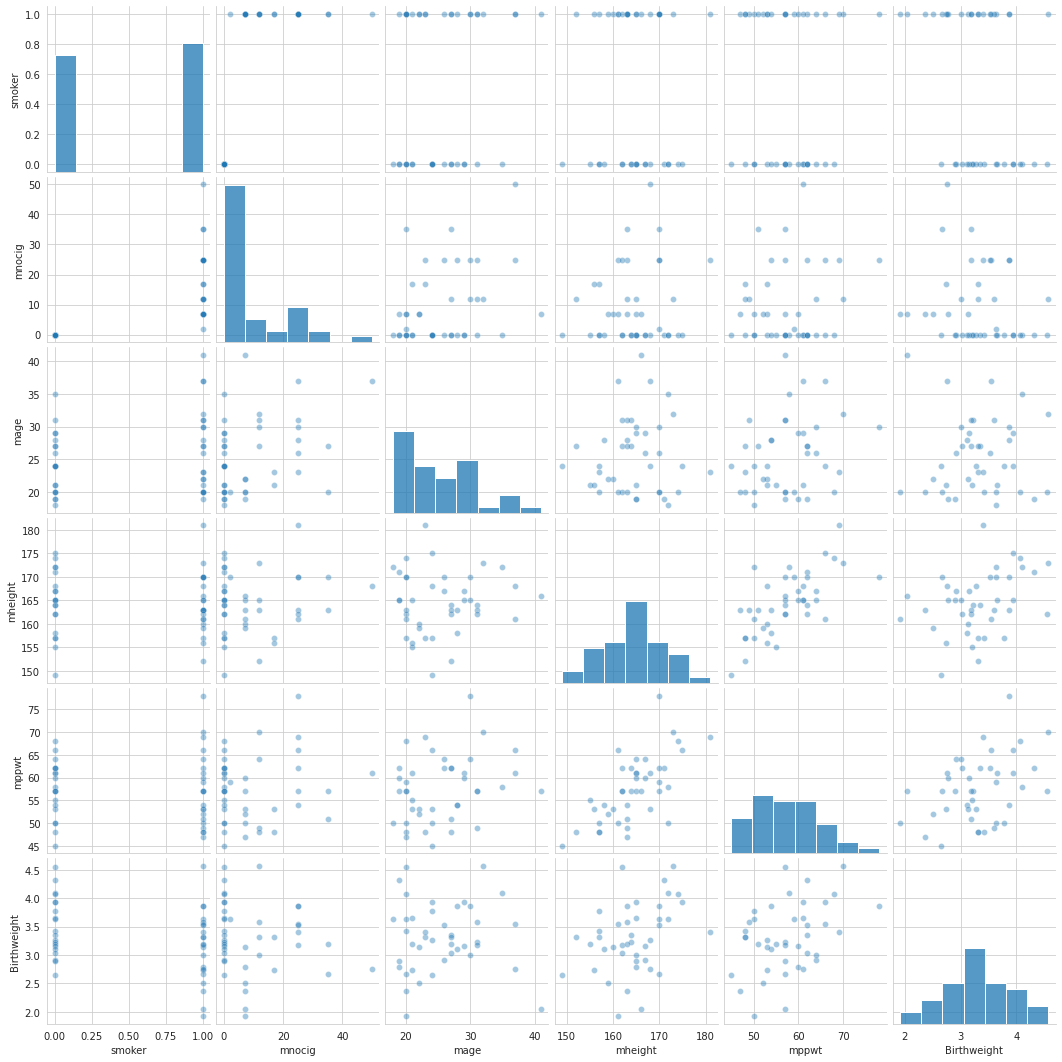

In [ ]:
# De la madre:

sns.pairplot(data = df, vars = ['smoker', 'mnocig', 'mage',  
                                'mheight', 'mppwt', 'Birthweight'],
             plot_kws={'alpha':0.4})

De este gráfico se desprende que las madres fumadoras tienen neonatxs en todo el rango de peso, mientras que las no fumadoras solo a partir del considerado peso mínimo normal.

La edad, altura y peso de la madre no parecieran cumplir ningún tipo de estructura que conocemos para estos datos.

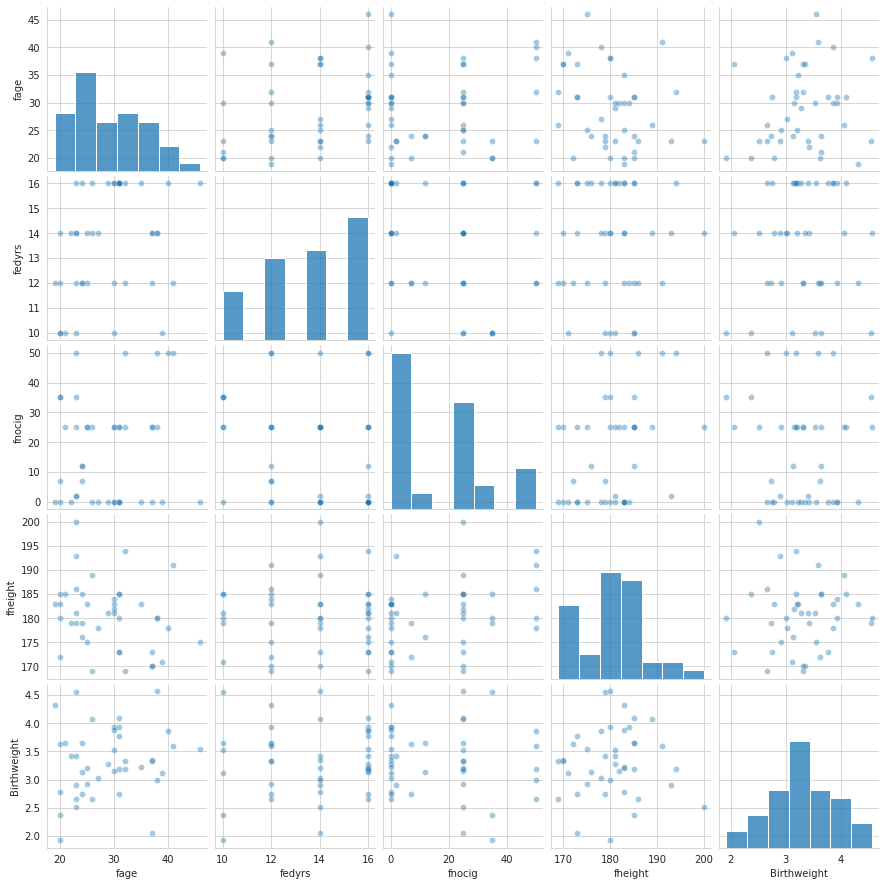

In [ ]:
# Del padre:

sns.pairplot(data = df, vars = ['fage', 'fedyrs', 'fnocig', 
                                'fheight', 'Birthweight'],
             plot_kws={'alpha':0.4})

Respecto al uso del tabaco, pareciera haber un comportamiento similar al de las madres.

Nuevamente la edad y la altura no parecen influir mucho.

En los años de educación del padre tampoco pareciera haber tanta relación.

Ahora queremos estudiar a las variables individualmente:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Cantidad')

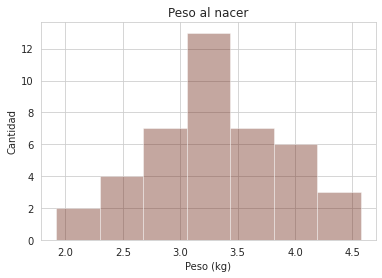

In [ ]:
sns.distplot(df["Birthweight"], kde = False, color = '#6D2312')
plt.title('Peso al nacer')
plt.xlabel('Peso (kg)')
plt.ylabel('Cantidad')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


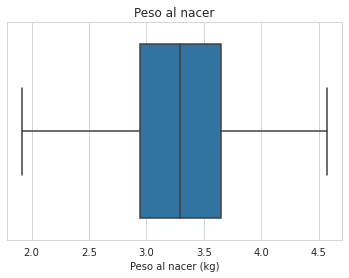

In [ ]:
# Boxplot de peso al nacer:

sns.boxplot(df.Birthweight)
plt.title('Peso al nacer')
plt.ylabel('')
plt.xlabel('Peso al nacer (kg)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Cantidad')

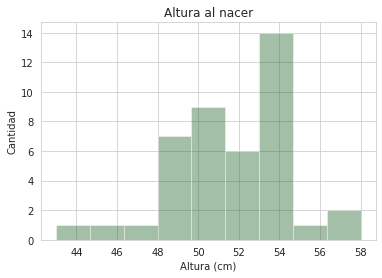

In [ ]:
sns.distplot(df["Length"], kde = False, color = '#1D6025') 
plt.title('Altura al nacer')
plt.xlabel('Altura (cm)')
plt.ylabel('Cantidad')

Ahora podemos hacer una matriz de correlación!

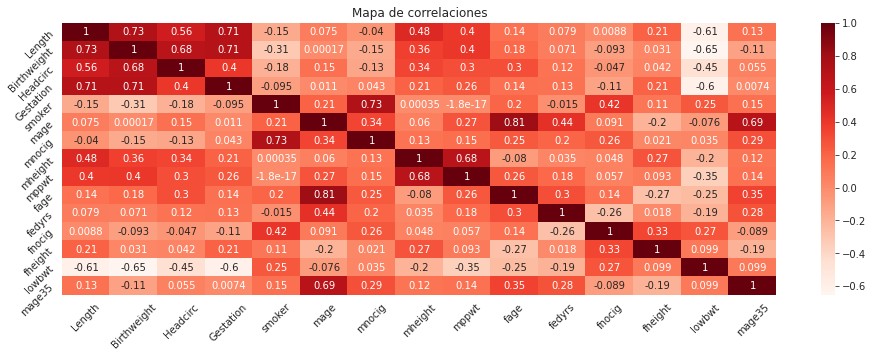

In [ ]:
# Primero creamos una matriz con las correlaciones entre variables de interés
correlacion = df.corr()

# Hacemos gráfico:
plt.figure(figsize = (16,5))
sns.heatmap(correlacion, annot = True, cmap = 'Reds')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Mapa de correlaciones')
plt.show()

# Modelado - regresión:

In [ ]:
# Importamos los paquetes necesarios:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error

Primero separamos "X" e "y", y a su vez en "train" y "test"


In [ ]:
X = df.drop("Birthweight", axis=1)
y = df.Birthweight

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Y verificamos sus tamaños:

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31, 14)
(11, 14)
(31,)
(11,)


Antes de entrenar a nuestro modelo definitivo, podríamos preguntarnos cuál es el valor ideal de K. Para eso, podemos iterar y ver cuándo tenemos un error bajo con un "buen" valor de K. En este caso usando RMSE:

In [ ]:
lista_rmse = []

for K in range(20):
  K = K + 1 # para no usar un K de 0 y llegar a 19
  knn = KNeighborsRegressor(n_neighbors = K)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  error = sqrt(mean_squared_error(y_test, y_pred))
  lista_rmse.append(error)
  print("El valor de RMSE para k =", K, "es: ", error)

El valor de RMSE para k = 1 es:  0.5468089245796927
El valor de RMSE para k = 2 es:  0.739096500034763
El valor de RMSE para k = 3 es:  0.7846056720455573
El valor de RMSE para k = 4 es:  0.7449965680213813
El valor de RMSE para k = 5 es:  0.7334357504239892
El valor de RMSE para k = 6 es:  0.7029400738859234
El valor de RMSE para k = 7 es:  0.7080007913792838
El valor de RMSE para k = 8 es:  0.7021789342338733
El valor de RMSE para k = 9 es:  0.7068244376322305
El valor de RMSE para k = 10 es:  0.6998549200305083
El valor de RMSE para k = 11 es:  0.7295974724638888
El valor de RMSE para k = 12 es:  0.755038170484704
El valor de RMSE para k = 13 es:  0.7507581608148685
El valor de RMSE para k = 14 es:  0.7542126895485564
El valor de RMSE para k = 15 es:  0.744363547541852
El valor de RMSE para k = 16 es:  0.7328171096482272
El valor de RMSE para k = 17 es:  0.7274649714458541
El valor de RMSE para k = 18 es:  0.7343968986275777
El valor de RMSE para k = 19 es:  0.7277972721180279
El va

También podemos verlo gráficamente:

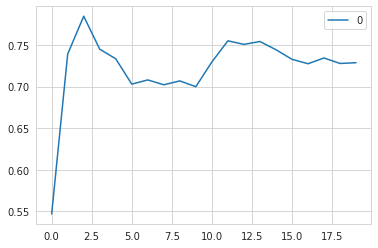

In [ ]:
curva = pd.DataFrame(lista_rmse)
curva.plot()

Decidimos tomar K = 10.

Ahora sí, ya podemos armar nuestro modelo:

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [ ]:
# Error en entrenamiento:

train_pred = knn.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = sqrt(mse_train)
rmse_train

0.49000072416009693

In [ ]:
# Error en testeo (más realista):

y_pred = knn.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = sqrt(mse_test)
rmse_test

0.6998549200305083

Ahora queremos saber la performance del modelo:

In [ ]:
print("Error cuadrático medio del modelo KNN:", sqrt(mean_squared_error(y_test,y_pred)))

Error cuadrático medio del modelo KNN: 0.6998549200305083


Pueden ver otras métricas posibles [acá](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

Ahora podemos hacer algo similar para un árbol de decisión:

In [ ]:
lista_rmse = []

for depth in range(20):
  depth = depth + 1 # para no usar un K de 0 y llegar a 19
  tree = DecisionTreeRegressor(max_depth = depth)
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)
  error = sqrt(mean_squared_error(y_test, y_pred))
  lista_rmse.append(error)
  print("El valor de RMSE para la profundidad =", depth, "es: ", error)

El valor de RMSE para la profundidad = 1 es:  0.5981353706941532
El valor de RMSE para la profundidad = 2 es:  0.48649411289914074
El valor de RMSE para la profundidad = 3 es:  0.3408221156143735
El valor de RMSE para la profundidad = 4 es:  0.3562475038466864
El valor de RMSE para la profundidad = 5 es:  0.4395709664074153
El valor de RMSE para la profundidad = 6 es:  0.4705291991712389
El valor de RMSE para la profundidad = 7 es:  0.4927761800618653
El valor de RMSE para la profundidad = 8 es:  0.4536493439571223
El valor de RMSE para la profundidad = 9 es:  0.4644742873791442
El valor de RMSE para la profundidad = 10 es:  0.48486174224299167
El valor de RMSE para la profundidad = 11 es:  0.49814200239033724
El valor de RMSE para la profundidad = 12 es:  0.5256251689006325
El valor de RMSE para la profundidad = 13 es:  0.4847773622077367
El valor de RMSE para la profundidad = 14 es:  0.5254521862167862
El valor de RMSE para la profundidad = 15 es:  0.46333769346106346
El valor de RMS

Decidimos quedarnos con una profundidad de 3.

In [ ]:
tree = DecisionTreeRegressor(max_depth = 3)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Error en entrenamiento:

train_pred = tree.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = sqrt(mse_train)
rmse_train

0.26395746003211434

In [ ]:
# Error en testeo (más realista):

y_pred = tree.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = sqrt(mse_test)
rmse_test

0.31002299906039676

Y ahora queremos saber la performance del modelo:

In [ ]:
print("Error cuadrático medio del modelo árbol:", sqrt(mean_squared_error(y_test,y_pred)))

Error cuadrático medio del modelo árbol: 0.31002299906039676


Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 0.26395746003211434
Raíz del error cuadrático medio en Test: 0.31002299906039676


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


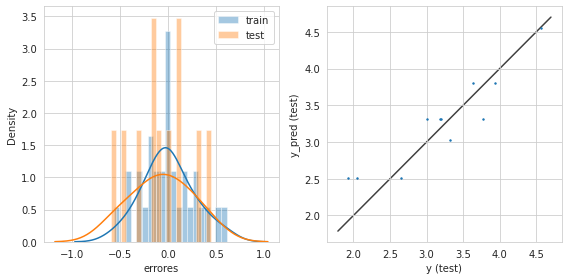

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 0.49000072416009693
Raíz del error cuadrático medio en Test: 0.6998549200305083


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


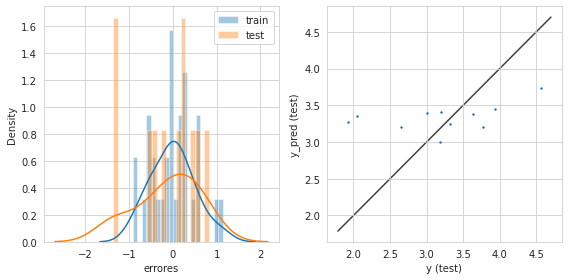

In [ ]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([tree, knn]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Con qué modelo se quedarían?